# What to expect

We will start our analysis from the mapped reads. The mapping was done using the package STAR. In this notebook we will take a look at the outputs generated by STAR for the <i>Schistosoma mansoni</i> dataset. We will guide you through the process of combining the results for each sample in the dataset into a single dataframe and viewing them using Principal Components Analysis. In the second part of this session, you will repeat this process for your choice of dataset in notebook 2B.

# The files

For each dataset, you will find some information in `data/<dataset>`:

1. `README` file with information on how the data was generated
2. `list_ids` file with the names of the samples - called accession numbers
3. `metadata` file with information on the experimental conditions for each sample

For each dataset, you will also find some files stored in `analysis/<dataset>`:

1. `star` folder - contains some of the outputs generated by STAR (others have been omitted to save space)
2. `multiqc` folder - contains a summary of the quality of mappings by STAR

We will use these files to complete our analysis

# Checking the quality of mapping
We have mapped our reads to the genome, so we can compare expression levels between our samples. But before moving on to the next step, we should check that our mapping was good. 

As explained before, the number of reads that map to a gene gives us a measure of how much that gene is being expressed. Therefore, for us to be confident in our quantification, the majority of reads should map to one and only one gene in the reference genome. There are valid reasons why a read can map to more than one gene, for example in the case of families of highly related genes. Reasons to be concerned include insufficiently stringent maping criteria, short reads that therefore map to several genes non-specifically, or other technical reasons. As a standard guide, a good quality sample will usually have at least 75% of the reads uniquely mapped.

One of the tools frequently used to check if the mapping was good is [MultiQC](https://multiqc.info/). MultiQC analyses the mapping for each of our samples and produces an HTML report summarizing it. We have run MultiQC on our files and provided it in the analysis subdirectories. Try opening `analysis/Schistosoma_mansoni/multiqc/multiqc_report.html` by double-clicking (you may need to click trust HTML in a banner).

<div class="alert alert-block alert-warning">

Discuss in your group:

- What % of reads mapped to only one gene of the reference genome?
- Are there any samples that look less good? In what way? How might this impact your results?

You can add some notes from your discussion on this text cell

\

\

\

<div class="alert alert-block alert-success">
<b>Learning outcomes</b>

You should now...

- Know how to interpret a MultiQC report
- Understand why it is important to check the quality of mapping

# Combining data across samples

Now that we are happy with our mapping, we can move on with the analysis. 

### Looking at mapping results
In the `star` folder there is a file for each of our samples. Each file contains the mapping result for that particular sample. Let's have a look at the mapping results for one of the samples.

In [1]:
! head -n 30 analysis/Schistosoma_mansoni/star/ERR022875ReadsPerGeneUnst.out.tab

N_unmapped	4374914
N_multimapping	1520436
N_noFeature	2230500
N_ambiguous	30599
gene:Smp_329140	0
gene:Smp_315690	0
gene:Smp_317470	0
gene:Smp_318880	34
gene:Smp_319020	0
gene:Smp_349630	0
gene:Smp_349560	0
gene:Smp_179970	22
gene:Smp_173350	14
gene:Smp_317840	0
gene:Smp_165590	0
gene:Smp_165600	0
gene:Smp_319240	0
gene:Smp_319340	145
gene:Smp_350240	0
gene:Smp_243170	170
gene:Smp_199340	1
gene:Smp_180260	0
gene:Smp_311250	1
gene:Smp_349570	0
gene:Smp_242000	0
gene:Smp_078490	0
gene:Smp_164480	15
gene:Smp_350510	0
gene:Smp_201260	0
gene:Smp_099150	13887


It would be very inconvenient if we had to open each file separately in order to look at the mapping results. Therefore, we will combine all the results in one dataframe. It will be our master dataframe. 

### Getting the list of samples in python

To create the master dataframe, we first need to provide python with a list of samples (accessions). These are stored in the file `data/Schistosoma_mansoni/list_ids.txt`. 

<div class="alert alert-block alert-warning">
Create a list that contains all the accession numbers (sample names) in our experiment.  

<details>
<summary><i>Hints and tips</i></summary>
    
    We practised this in the previous notebook. If you need to, go back and use that code.

</details>

In [2]:
# Create a new list called accessions. The list will be empty for now. 
accessions = []
# open the "list_ids.txt" for the Schisto dataset as read only
# use a for loop to go through the list_ids.txt file and add each accession number into the new list
# make sure that any whitespace or newline characters are removed before adding the accession number to the list
with open("data/Schistosoma_mansoni/list_ids.txt", "r") as file:
    for line in file:
            accessions.append(line.strip())
# have a look at the list to check it all worked well
accessions

['ERR022872',
 'ERR022873',
 'ERR022874',
 'ERR022875',
 'ERR022876',
 'ERR022877',
 'ERR022878',
 'ERR022879',
 'ERR022880',
 'ERR022881',
 'ERR022882',
 'ERR022883']

### Create the master dataframe
Now that we have our accessions list, we are going to use it to create our master dataframe.  

We will work with pandas dataframes, as we did in notebook 1.

The dataframe should have the gene name as index, and a column of reads per gene for each sample. Each column should have the accession number of that sample as column name.

We need some code that:
- for each accession number in the accessions list, reads the corresponding `ReadsPerGeneUnst.out.tab` file
- Puts the contents of that file into a dataframe that has the gene names as index and a column with the accession number as column name, and the counts for each gene in each row. 
- Adds that column we just generated to a master dataframe using `join` . You used `join` in notebook 1.

Because this is again a repetitive process (the code has to do the same thing for each of our samples) we will need to write another loop.

<div class="alert alert-block alert-warning">
    
Try to fill the gaps `...` in the code below to create the master dataframe.

In [ ]:
# Import pandas library
import pandas as pd

# Create the master dataframe
master_df = pd.DataFrame() #This change removes the need for the conditional statement at the end of the for loop, but maybe you want to keep that in? 


# Create a loop that for each accession in the list "accessions", will:
# (1) print the accession number (this allows us to check that the code is working well)
# (2) read the ReadsPerGeneUnst.out.tab file for that same accession number into a temporary dataframe "counts_df" that has
# the gene names column as index and has the column names ["gene", "reads"]
# (3) copy the gene counts data to a new column named as the accession number
# (4) Extract that new column with the current accession's read counts into a smaller dataframe "accession_df"
# (5) use a dataframe join to add this column to the master dataframe. Note that not all samples might express the same genes, 
# so the indexes might not be the same. Think about the type of join you need here.

for accession in accessions:
    print(accession)
    file = f"analysis/Schistosoma_mansoni/star/{accession}ReadsPerGeneUnst.out.tab"
    counts_df = pd.read_csv(file, index_col=0, sep="\t", names=["gene", "reads"])
    counts_df[accession] = counts_df["reads"]
    accession_df = counts_df[[accession]]
    master_df = master_df.join(accession_df, how='outer')

ERR022872
ERR022873
ERR022874
ERR022875
ERR022876
ERR022877
ERR022878
ERR022879
ERR022880
ERR022881
ERR022882
ERR022883


Let's have a look at our master dataframe we just created

In [4]:
master_df

,ERR022872,ERR022873,ERR022874,ERR022875,ERR022876,ERR022877,ERR022878,ERR022879,ERR022880,ERR022881,ERR022882,ERR022883
gene,,,,,,,,,,,,
MissingGeneID,236,239,102,121,365,341,200,176,121,144,138,154
N_ambiguous,46979,29821,9764,30599,36822,63586,45880,67680,61684,57229,59932,61087
N_multimapping,2423184,2664418,1672815,1520436,5537395,4239621,2884424,5152579,3098476,3353223,2928530,3040167
N_noFeature,3460393,2119007,1808978,2230500,6715840,9579956,6630887,7633069,5845823,5350460,5180375,5694282
N_unmapped,9713472,2884272,4220356,4374914,13889423,12598043,8800443,8713202,8186486,9961049,8334872,8178659
...,...,...,...,...,...,...,...,...,...,...,...,...
gene:Smp_900070,53596,23333,1567,41482,8333,44138,32248,5266,7790,9944,20894,16959
gene:Smp_900080,3680,3647,129,4700,719,18493,8234,786,1357,1056,2559,2469
gene:Smp_900090,157096,61805,5871,196705,28999,206111,156191,8468,13032,14253,37073,28150


### Clean and save the master dataframe

Hopefully you can see that, although the structure of the dataframe looks good, we need to get rid of the first 5 rows, as they contain summary information instead of gene counts. In DExB2, you already learned ways to either remove columns (week 2, class 3) or to slice the dataframe (week 4, class 8).

In addition, it is likely that not all samples express the same genes. If reads were mapped to a gene for sample 1, but not for sample 2, in our dataframe we will have a number of reads for sample 1 and an empty value "NaN" for sample 2. We want to replace those empty values with 0. You already practised how to change NaN values in a dataframe in notebook 1. 

We also want to save the master dataframe as a csv file. 


<div class="alert alert-block alert-warning">

Try to fill the gaps `...` in the code below to clean the dataframe and save it as csv

In [ ]:
# Keep only the relevant rows
master_df_clean = master_df.iloc[5:] #I've changed this because if you assign it back to master_df, you chop off 5 more rows every time this cell is run!
# Replace any empty values with 0
master_df_clean.fillna(0,inplace=True)
# save the dataframe as a csv file
master_df_clean.to_csv(f"analysis/Schistosoma_mansoni/star/ReadsPerGene.csv")
# have a look at the cleaned master_df
master_df_clean

/tmp/ipykernel_26372/2820802085.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  master_df_clean.fillna(0,inplace=True)


,ERR022872,ERR022873,ERR022874,ERR022875,ERR022876,ERR022877,ERR022878,ERR022879,ERR022880,ERR022881,ERR022882,ERR022883
gene,,,,,,,,,,,,
gene:Smp_000020,3210,2088,1110,2285,4027,5330,3281,9008,8140,7242,6129,6792
gene:Smp_000030,12471,11096,5521,9389,18769,23578,17393,26427,23891,23569,21432,22569
gene:Smp_000040,2613,6520,1253,1883,4733,4596,3082,12887,11370,10838,9726,10749
gene:Smp_000050,921,674,933,213,3709,1575,1104,18191,8154,6218,5800,7325
gene:Smp_000070,1417,951,435,647,1533,2135,1618,2030,2333,2397,2197,2459
...,...,...,...,...,...,...,...,...,...,...,...,...
gene:Smp_900070,53596,23333,1567,41482,8333,44138,32248,5266,7790,9944,20894,16959
gene:Smp_900080,3680,3647,129,4700,719,18493,8234,786,1357,1056,2559,2469
gene:Smp_900090,157096,61805,5871,196705,28999,206111,156191,8468,13032,14253,37073,28150


# Normalisation
The number of reads mapping to each gene is proportional to the number of expressed transcripts of those genes in each sample. However, there are other factors which affect the number of reads mapping such as sequencing depth (which differs between samples) and gene length (which differs between genes) as well as the overall RNA composition (e.g. a small number of very highly expressed genes or a difference in the overall number of genes expressed between samples can skew some methods). Normalisation is the process of scaling the raw counts to account for these other factors so that the expression levels are more comparable.

There are different methods for normalisation, depending on the comparison we want to perform. For example, an analysis might look within a single sample to see which genes are mostly highly expressed in that sample. It might look at which genes are most highly expressed in a sample group representing a single tissue type or developmental stage. Or it might look at the differential expression (DE) between 2 different sample groups. 
The following table is taken from a [Harvard Chan Bioinformatics Core tutorial](https://hbctraining.github.io/DGE_workshop/lessons/02_DGE_count_normalization.html) on the topic:

|                                 Normalisation method                                |                                                          Description                                                         |                  Accounted factors                 |                                                                                             |
|:-----------------------------------------------------------------------------------:|:----------------------------------------------------------------------------------------------------------------------------:|:--------------------------------------------------:|:-------------------------------------------------------------------------------------------------------------------:|
| CPM (counts per million)                                                            | counts scaled by total number of reads                                                                                       | sequencing depth                                   |  |
| TPM (transcripts per kilobase million)                                              | counts per length of transcript (kb) per million reads mapped                                                                | sequencing depth and gene length                   |             |
| RPKM/FPKM (reads/fragments per kilobase of exon per million reads/fragments mapped) | similar to TPM                                                                                                               | sequencing depth and gene length                   |             |
| DESeq2’s median of ratios                                                      | counts divided by sample-specific size factors determined by median ratio of gene counts relative to geometric mean per gene | sequencing depth and RNA composition               |                        |
| EdgeR’s trimmed mean of M values (TMM)                                        | uses a weighted trimmed mean of the log expression ratios between samples                                                    | sequencing depth, RNA composition, and gene length |                                                |

<div class="alert alert-block alert-warning">
Discuss in your group which normalisation method might be more appropriate for our analysis. You can use the Harvard Chan Bioinformatics Core tutorial provided above

You can add some notes from your discussion in this text cell

\

\

\

<div class="alert alert-block alert-success">
<b>Learning outcomes</b>
    
You should now know...

- What normalisation is 
- Which factors may need to be controlled for different types of gene count comparisons and why

In this case, we will use the DESeq2 inbuilt method for normalisation. To implement it, we will use the python package [PyDESeq2](https://pydeseq2.readthedocs.io/en/latest/api/index.html). 

This method requires two inputs:

- a table with all our counts, just like the dataframe we have just created, but it needs to be transposed, so the sample names are in the first column. You already learned how to transpose a datfarame in DExB2, week 2, class 4.
- a metadata table that specifies what each sample is. We have that information in the 'metadata.csv' file in our dataset folder, so we just need to read that into a dataframe. 

<div class="alert alert-block alert-warning">
    
Create the counts and the metadata tables

In [12]:
#create the counts matrix by transposing our master_df
counts = master_df_clean.T

#create the metadata table. The index should be the accession number.
metadata = pd.read_csv("data/Schistosoma_mansoni/metadata.csv", index_col=0)

#Let's have a look at the metadata to make sure it looks right.
print(metadata)

                          stage
accession                      
ERR022872             cercarium
ERR022873   platyhelminth adult
ERR022874   3 hr schistosomulum
ERR022875             cercarium
ERR022876   3 hr schistosomulum
ERR022877             cercarium
ERR022878             cercarium
ERR022879   3 hr schistosomulum
ERR022880  24 hr schistosomulum
ERR022881  24 hr schistosomulum
ERR022882  24 hr schistosomulum
ERR022883  24 hr schistosomulum


We are now ready to go ahead with the PyDESeq2 analysis

In [13]:
#To start the analysis, let's intall PyDESeq2
! pip install --quiet pydeseq2

# and import the "DeseqDataSet" class from the dds module of PyDESeq2
from pydeseq2.dds import DeseqDataSet

Now, we will use the DeseqDataSet class to create a "dds" object, which is an annotated data matrix, called [AnnData](https://anndata.readthedocs.io/en/latest/generated/anndata.AnnData.html#anndata.AnnData). To create the dds object, we provide some arguments: 

- `counts` is our transposed master_df matrix
- `metadata` is our metadata table that we just created
- `refit_cooks` indicates whether Cook's distance should be recalculated during the analysis. You do not have to worry about the details, we will just indicate that we do want to recalculate Cook's distance.
- `design` is where we indicate what we want to use to compare samples. In our experiment we want to compare gene expression between the different developmental stages, so we specify "stage" as our design factor

In [15]:
dds = DeseqDataSet(
    counts=counts,
    metadata=metadata,
    refit_cooks=True,
    design="stage"
)

dds

AnnData object with n_obs × n_vars = 12 × 9896
    obs: 'stage'
    obsm: 'design_matrix'

Once we have created the dds object, we will apply the `deseq2` method to it. This method normalises the data, estimates the dispersion and calculates the log fold change (LFC) based on the design factor.

In [16]:
dds.deseq2()
dds

Using None as control genes, passed at DeseqDataSet initialization


Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 4.59 seconds.

Fitting dispersion trend curve...
... done in 0.36 seconds.

Fitting MAP dispersions...
... done in 6.10 seconds.

Fitting LFCs...
... done in 3.40 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.



AnnData object with n_obs × n_vars = 12 × 9896
    obs: 'stage', 'size_factors', 'replaceable'
    var: '_normed_means', 'non_zero', '_MoM_dispersions', 'genewise_dispersions', '_genewise_converged', 'fitted_dispersions', 'MAP_dispersions', '_MAP_converged', 'dispersions', '_outlier_genes', '_LFC_converged', 'replaced', 'refitted', '_pvalue_cooks_outlier'
    uns: 'trend_coeffs', 'disp_function_type', '_squared_logres', 'prior_disp_var'
    obsm: 'design_matrix', '_mu_LFC', '_hat_diagonals'
    varm: 'LFC'
    layers: 'normed_counts', '_mu_hat', 'cooks'

Note that new elements have been added to the AnnData object, included LFC and normed counts, for example. Let's have a look at the normed counts

In [17]:
# View the normed counts
dds.layers['normed_counts']

array([[  5156.66498438,  20033.88442997,   4197.62168355, ...,
        252364.93532274,  16792.09317187, 221281.97246207],
       [  3719.68204557,  19767.04596629,  11615.0991078 , ...,
        110102.94484015,  20912.5227648 , 107500.23628241],
       [  4109.11348136,  20438.21218973,   4638.48575869, ...,
         21733.87860277,    544.17989348,  15255.54653756],
       ...,
       [  3989.22181854,  12982.87338321,   5970.06159478, ...,
          7851.19836781,    451.14231834,   7529.50470004],
       [  3821.27273688,  13362.29683421,   6063.90906166, ...,
         23114.05517612,   5348.16079898,  26278.80968948],
       [  3685.40550292,  12246.15971664,   5832.51233081, ...,
         15274.46479788,   2481.89705099,  16301.08246742]])

<div class="alert alert-block alert-success">
<b>Learning outcome</b>
    
- You shoudl now know how to use pyDESeq2 to normalize your data

# PCA Plot

In our experiment, we have 12 different samples (three replicates of 3 hr schistosomulum, four replicates of 24 hr schistosomulum, four replicates of cercarium and one replicate of platyhelminth adult). For each of these samples, we have gene counts for thousands of genes. It would be useful at this point to have an overview of the data. We expect the replicates within each stage to be very similar between them, but to be different from the other stages.  Principal Component Analysis (PCA) helps us do this.  You studied PCA in detail during DExB2. Look at the week 7, class 14 is you need a refresher. This [viceo](https://www.youtube.com/watch?v=5vgP05YpKdE) provides a simple overview of the concept. 

In our experiment, PCA will look at all the normalised gene counts and construct groups of genes (the "components") that describe as much of the variation between samples as possible. Plotting the first 2 components identified in the analysis can therefore be a useful way to visualize the effect of experimental covariates as well as batch effects.

We are going to use PCA to have a look at our data. We will perform the PCA and create the plot with the python library [scanpy](https://scanpy.readthedocs.io/en/stable/)

In [18]:
! pip install --quiet scanpy

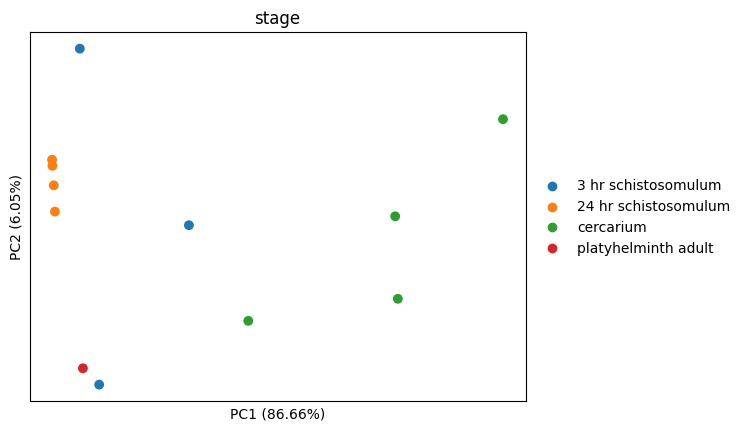

In [19]:
import scanpy as sc

# Use scanpy to plot the first 2 components
sc.tl.pca(dds)
sc.pl.pca(dds, size=200, color="stage", annotate_var_explained=True)

<div class="alert alert-block alert-warning">

Discuss in your group:
- Is there a separation of the different developmental stages in the PCA plot?
- How well do the replicates for each stage cluster together
?- How much variance is explained by the first 2 principal components?
- What is PC1 separating?
- What is PC2 separating?

You can add some notes from your discussion in this text cell

\

\

\

We can now look at which genes are contributing to each component, and compare how much each gene contribute. This is called "loadings".

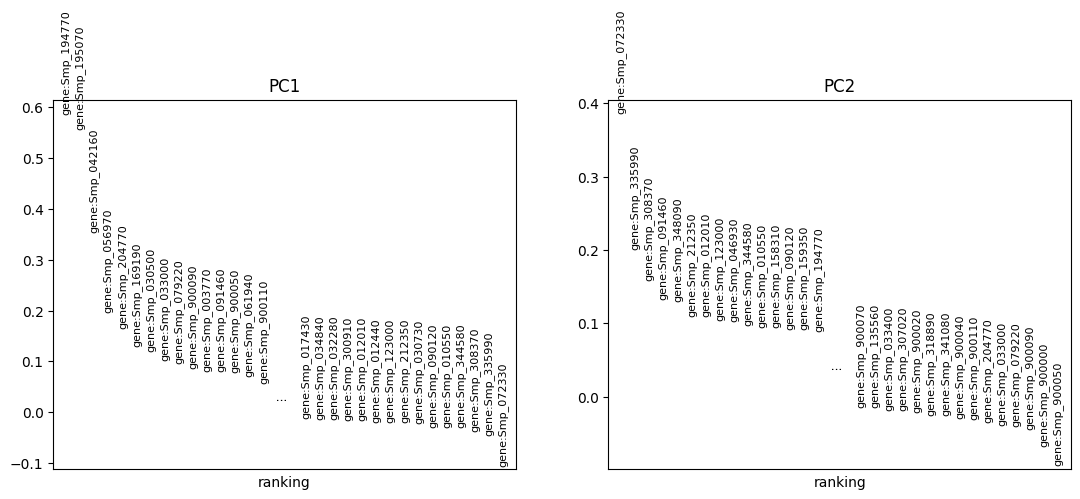

In [20]:
sc.pl.pca_loadings(dds, components = '1,2')

<div class="alert alert-block alert-warning">

Discuss in your group:

- Which 3 genes contribute most to PC1?
- Which 2 contribute most to PC2?

You can add some notes from your discussion in this text cell

\

\

\

<div class="alert alert-block alert-success">
<b>Learning outcomes</b>
    
You should now know...
    
- Why we perform PCA to visualize data
- How to interpret a PCA plot
- How to use scanpy to perform PCA and extract the loadings for each component